In [57]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1.1

In [3]:
iris_ds = datasets.load_iris()

X = iris_ds.data
y = iris_ds.target
f_names = iris_ds.feature_names

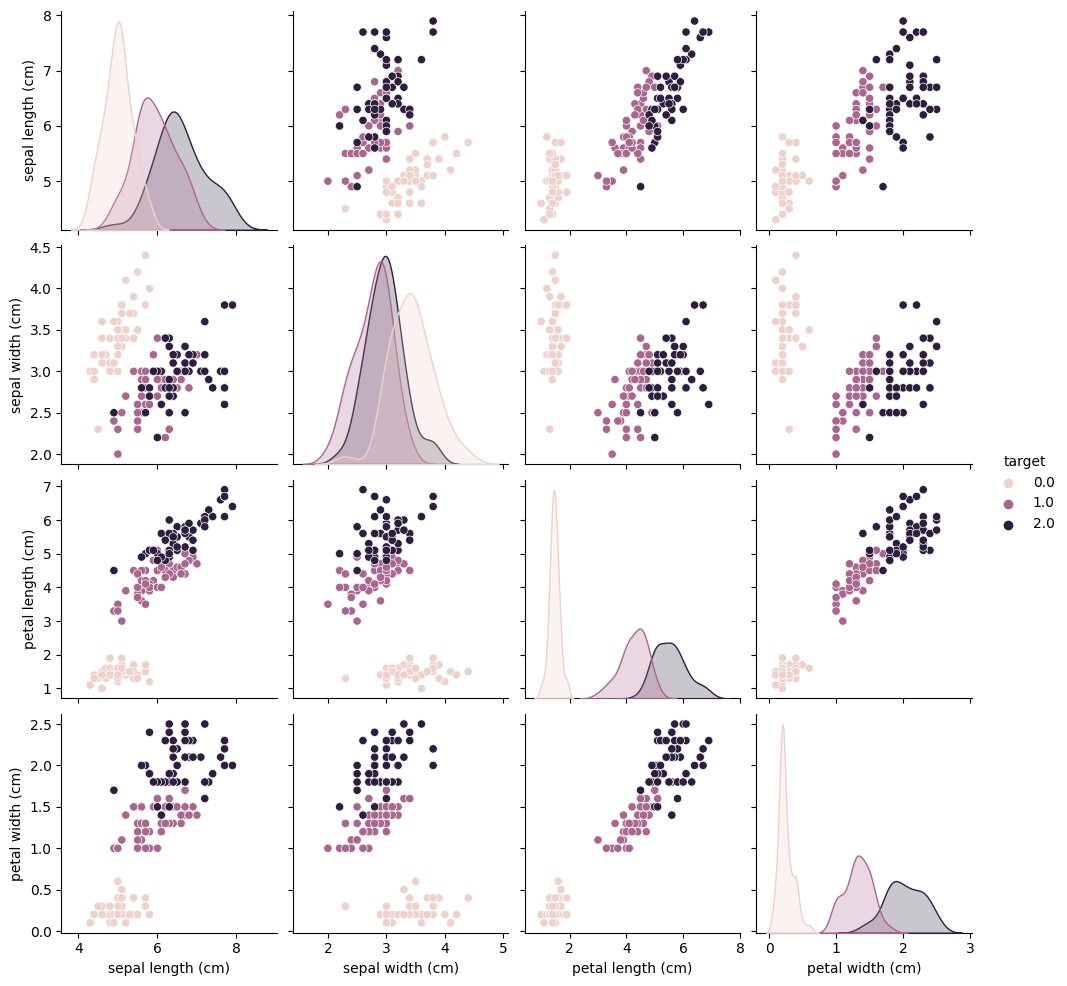

In [4]:
iris = pd.DataFrame(data= np.c_[iris_ds['data'], iris_ds['target']],
                     columns= iris_ds['feature_names'] + ['target'])
g = sns.pairplot(iris, hue='target')

In [21]:
data = pd.DataFrame(data=iris_ds['data'], columns=iris_ds['feature_names'])

In [22]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
iris.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: >

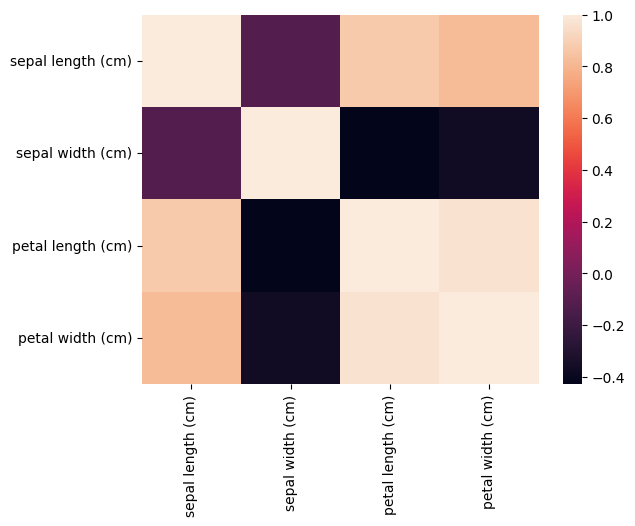

In [39]:
sns.heatmap(iris.iloc[:,:4].corr())

In [28]:
dataWithTarget = pd.DataFrame(data=np.c_[iris_ds['data'], iris_ds['target']],
                              columns=iris_ds['feature_names'] + ['target'])

In [29]:
dataWithTarget

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
dataWithTarget.iloc[:,[0, 1, 2, 3, 4]].groupby('target').corr()

sepal length (cm)  sepal width (cm)  \
target                                                          
0.0    sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1.0    sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2.0    sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0.0    sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1.0    sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2.0    sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

<AxesSubplot: ylabel='target-None'>

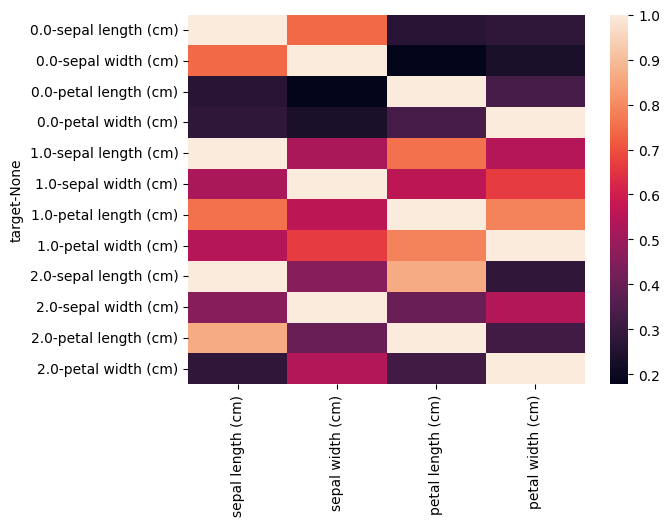

In [61]:
sns.heatmap(dataWithTarget.iloc[:,[0, 1, 2, 3, 4]].groupby('target').corr())

# 1.2

In [41]:
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [43]:
X = iris_ds.data[iris.target!=0, :2]
y = iris_ds.target[iris.target!=0]

In [52]:
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='poly', degree=2),LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),LogisticRegression()]
titles = ['SVC linear','SVC quadratic','Linear discriminant','Quadratic discriminant','Logistic Regression']

In [53]:
for model in models:
    model.fit(X,y)

In [54]:
# src: https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

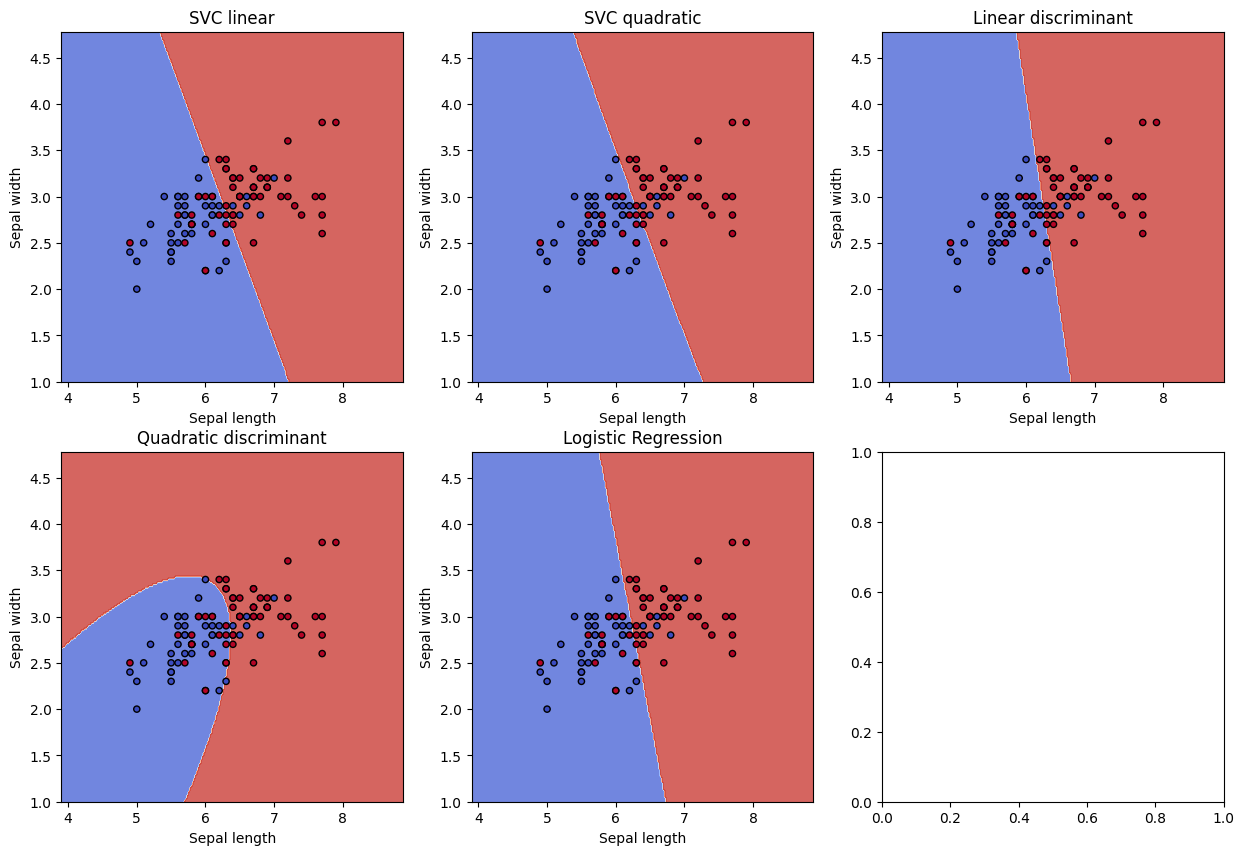

In [60]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for model, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

# 1.3

In [62]:
X = iris_ds.data[:,:2]
y = iris_ds.target

In [63]:
LinDisModel = LinearDiscriminantAnalysis()
LinDisModel.fit(X, y)

LinearDiscriminantAnalysis()

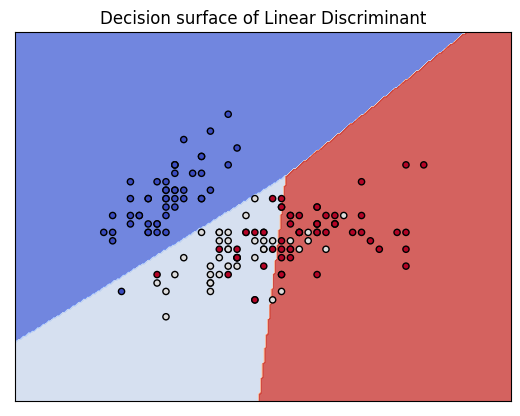

In [66]:
fig, ax = plt.subplots()
title = ('Decision surface of Linear Discriminant')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, LinDisModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()